In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [60]:
plt.rc('figure',dpi=100);

In [61]:
anuncios = pd.read_csv("../Data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv")
anuncios.head()


,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


Text(0,0.5,'Cantidad de anuncios')

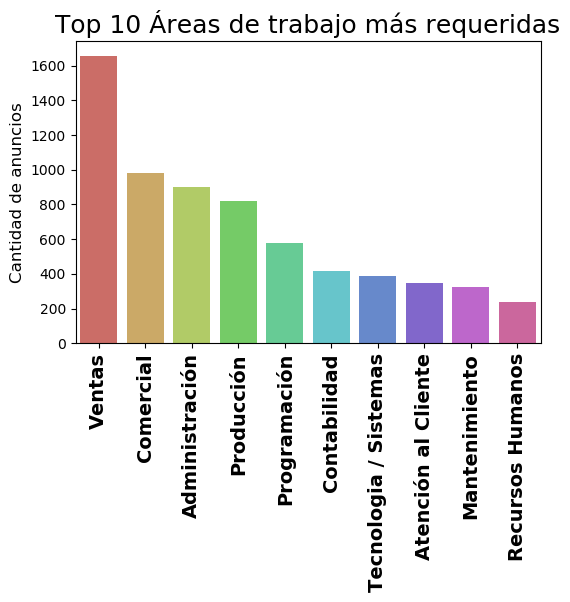

In [77]:
anuncios_por_area = sns.countplot(x='nombre_area', data=anuncios, order=anuncios['nombre_area']\
                                 .value_counts().iloc[:10].index, orient='v', palette='hls')
anuncios_por_area.set_xticklabels(anuncios_por_area.get_xticklabels(), rotation= 90, weight='bold', fontsize=14)
anuncios_por_area.set_title("Top 10 Áreas de trabajo más requeridas", fontsize =18)
anuncios_por_area.set_xlabel("", fontsize = 12)
anuncios_por_area.set_ylabel("Cantidad de anuncios", fontsize = 12)

In [63]:
grupo = anuncios.groupby("denominacion_empresa", as_index=False).agg({'idaviso':'count'}).sort_values(by='idaviso', ascending=False)
grupo.rename(columns={'idaviso':'cantidad_avisos'}, inplace=True)
grupo.head(20)

,denominacion_empresa,cantidad_avisos
1944,RANDSTAD,562
1595,Manpower,422
1163,Grupo Gestión,383
201,Assistem,289
2137,SOLUTIX S.A.,260
235,BAYTON,238
1921,Pullmen Servicios Empresarios S.A.,229
125,Adecco - Región NORTE & OESTE GBA,205
2243,Suministra,203
129,Adecco -Región Office,200


In [64]:
def rango_avisos(cantidad_avisos):
    if cantidad_avisos < 5:
        return "Menos de 5"
    if cantidad_avisos < 10:
        return "Entre 5 y 10"
    if cantidad_avisos < 20:
        return "Entre 10 y 20"
    if cantidad_avisos < 50:
        return "Entre 20 y 50"
    if cantidad_avisos < 100:
        return "Entre 50 y 100"
    return "Mas de 100"

In [65]:
grupo['rango_avisos'] = grupo['cantidad_avisos'].map(rango_avisos)
grupo.head()
grupo = grupo.groupby("rango_avisos").agg({'cantidad_avisos':'sum'}).reset_index()
grupo.head()


,rango_avisos,cantidad_avisos
0,Entre 10 y 20,1374
1,Entre 20 y 50,1990
2,Entre 5 y 10,1348
3,Entre 50 y 100,1514
4,Mas de 100,3945


[Text(0,0,'Menos de 5'),
 Text(0,0,'Entre 5 y 10'),
 Text(0,0,'Entre 10 y 20'),
 Text(0,0,'Entre 20 y 50'),
 Text(0,0,'Entre 50 y 100'),
 Text(0,0,'Mas de 100')]

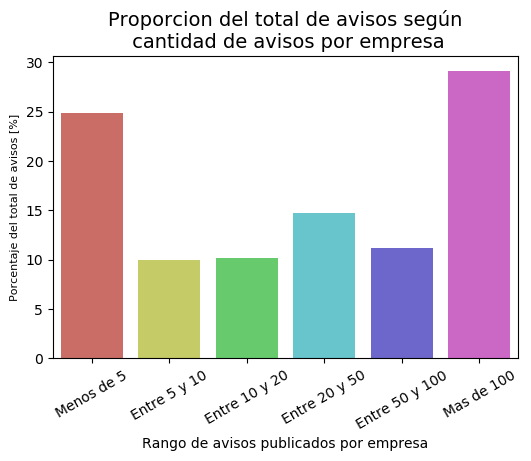

In [66]:
grupo["propTotal"] = 100*(grupo["cantidad_avisos"]/grupo["cantidad_avisos"].sum()) 

cantidad_anuncios_por_tamanio = sns.barplot(x='rango_avisos', y='propTotal', data=grupo, order=['Menos de 5', \
        'Entre 5 y 10', 'Entre 10 y 20', 'Entre 20 y 50', 'Entre 50 y 100', 'Mas de 100'], palette='hls')
cantidad_anuncios_por_tamanio.set_title("Proporcion del total de avisos según\n cantidad de avisos por empresa", fontsize = 14)
cantidad_anuncios_por_tamanio.set_xlabel("Rango de avisos publicados por empresa")
cantidad_anuncios_por_tamanio.set_ylabel("Porcentaje del total de avisos [%]", fontsize = 8)
cantidad_anuncios_por_tamanio.set_xticklabels(cantidad_anuncios_por_tamanio.get_xticklabels(), rotation=30)

In [67]:
anuncios['nivel_laboral'].value_counts()

Senior / Semi-Senior                    9407
Junior                                  2216
Otro                                     921
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

Text(0.5,1,'Anuncios por nivel laboral pretendido')

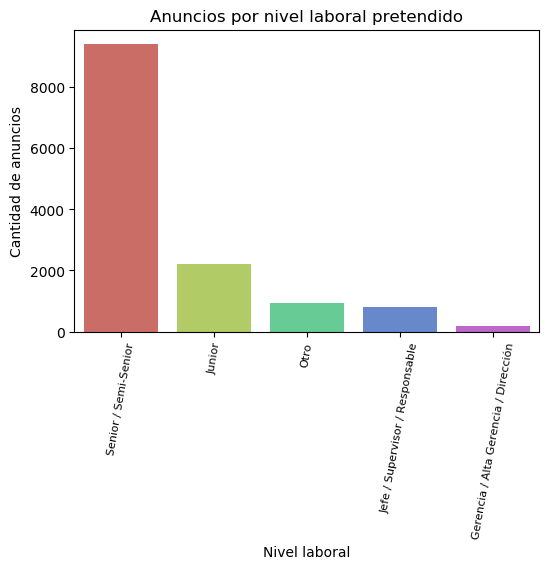

In [68]:
por_nivel_laboral = sns.countplot(x='nivel_laboral', data=anuncios, order=anuncios['nivel_laboral'].value_counts().index, palette='hls')
por_nivel_laboral.set_xlabel('Nivel laboral')
por_nivel_laboral.set_ylabel('Cantidad de anuncios')
por_nivel_laboral.set_xticklabels(por_nivel_laboral.get_xticklabels(), rotation=80, fontsize = 8)
por_nivel_laboral.set_title("Anuncios por nivel laboral pretendido")

In [69]:
postulaciones = pd.read_csv('../Data/datos_navent_fiuba/fiuba_4_postulaciones.csv')

Text(0,0.5,'Cantidad de Avisos')

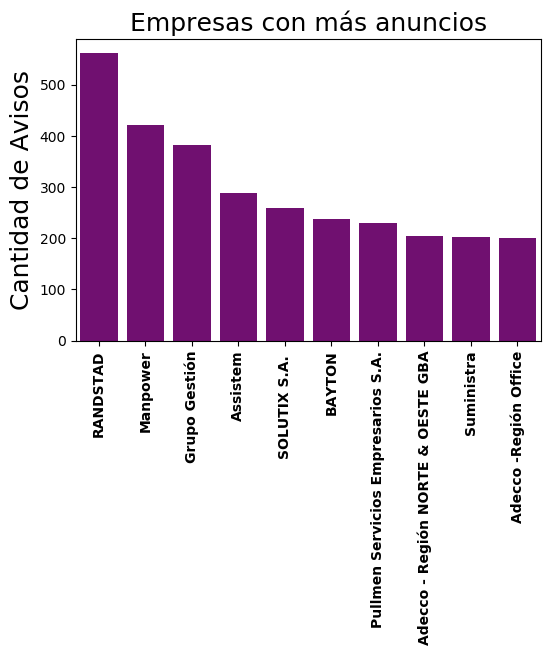

In [70]:
g = sns.countplot(x='denominacion_empresa', data=anuncios,order=anuncios['denominacion_empresa'].value_counts().iloc[:10].index,palette=['purple'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, weight='bold')
g.set_title("Empresas con más anuncios", fontsize=18)
g.set_xlabel("", fontsize=18)
g.set_ylabel("Cantidad de Avisos", fontsize=18)

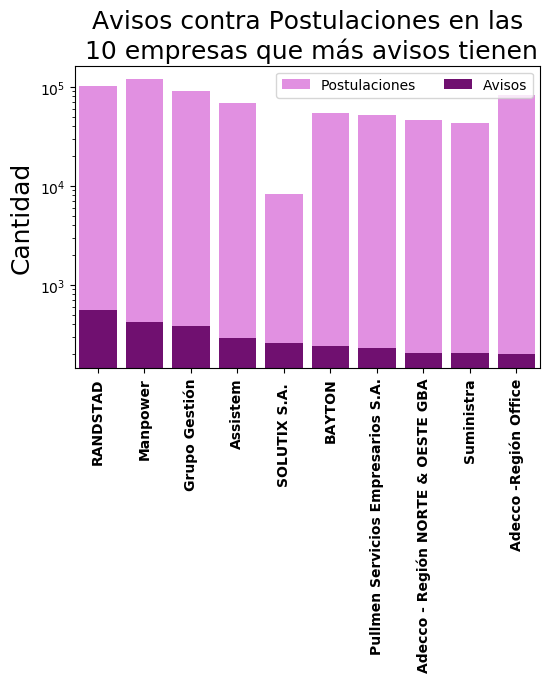

In [71]:
postulaciones_detalle=pd.merge(postulaciones, anuncios, on='idaviso',how='inner')
g = sns.countplot(x='denominacion_empresa', data=postulaciones_detalle,order=anuncios['denominacion_empresa'].value_counts().iloc[:10].index,palette=['violet'])
g = sns.countplot(x='denominacion_empresa', data=anuncios,order=anuncios['denominacion_empresa'].value_counts().iloc[:10].index,palette=['purple'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, weight='bold')
g.set_yscale('log')
g.set_title("Avisos contra Postulaciones en las\n 10 empresas que más avisos tienen", fontsize=18)
g.set_xlabel("", fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)
g.legend(['Postulaciones','Avisos'],ncol=2, loc='upper right');

#g = sns.distplot(postulaciones_detalle.denominacion_empresa.value_counts().mean())

In [72]:
grupo = anuncios.groupby("denominacion_empresa", as_index=False).agg({'idaviso':'count'}).sort_values(by='idaviso', ascending=False)
grupo.rename(columns={'idaviso':'cantidad_avisos'}, inplace=True)
#postulaciones.drop("idpostulante", axis = 1, inplace = True)
postulaciones.head()
#anuncios = anuncios[anuncios['denominacion_empresa'] == "SOLUTIX S.A."]
#what
#anuncios["denominacion_empresa"].value_counts()
anuncios

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL
5,1001135716,1,Vendedor Viajante TUCUMAN/SANTIAGO DEL ESTERO,<p>Somos una empresa multinacional que opera e...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A
6,1001326344,1,Vendedor Viajante RECONQUISTA/AVELLANEDA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A
7,1001455648,1,Vendedor Viajante PILAR / ESCOBAR/TIGRE,<p>Somos una empresa multinacional que opera e...,Gran Buenos Aires,NaN,NaN,Full-time,Junior,Ventas,Wurth Argentina S.A
8,9240880,1,"Productores Asesores Independiente, para venta...",Agente\noficial Selecciona:</span></strong></p...,Capital Federal,Buenos Aires,NaN,Full-time,Jefe / Supervisor / Responsable,Comercial,Agencia Oficial Alejandro Arizaga
9,1001202662,1,"promotor/a , asesor/a",<p>En Cerantola nos encontramos en la busqueda...,Gran Buenos Aires,NaN,NaN,Full-time,Otro,Atención al Cliente,cerantola
